# Pima indian diabetes 을 이용한 당뇨병 예측

## 1. 데이터 확인

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('data/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 임신횟수 별 당뇨 유무를 그룹화
grouped = dataset['Outcome'].groupby(dataset['Pregnancies'])
grouped.mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

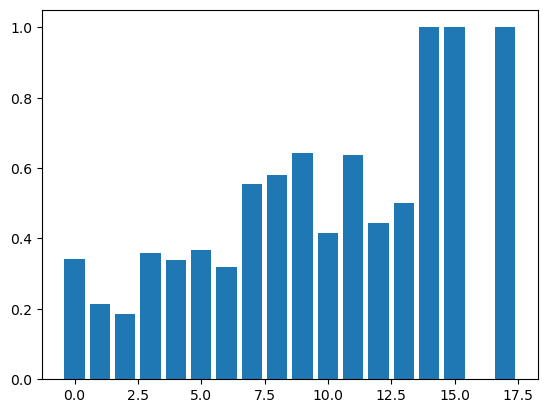

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(grouped.mean().index, grouped.mean().values)
plt.show()
plt.tight_layout()

In [8]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

In [9]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

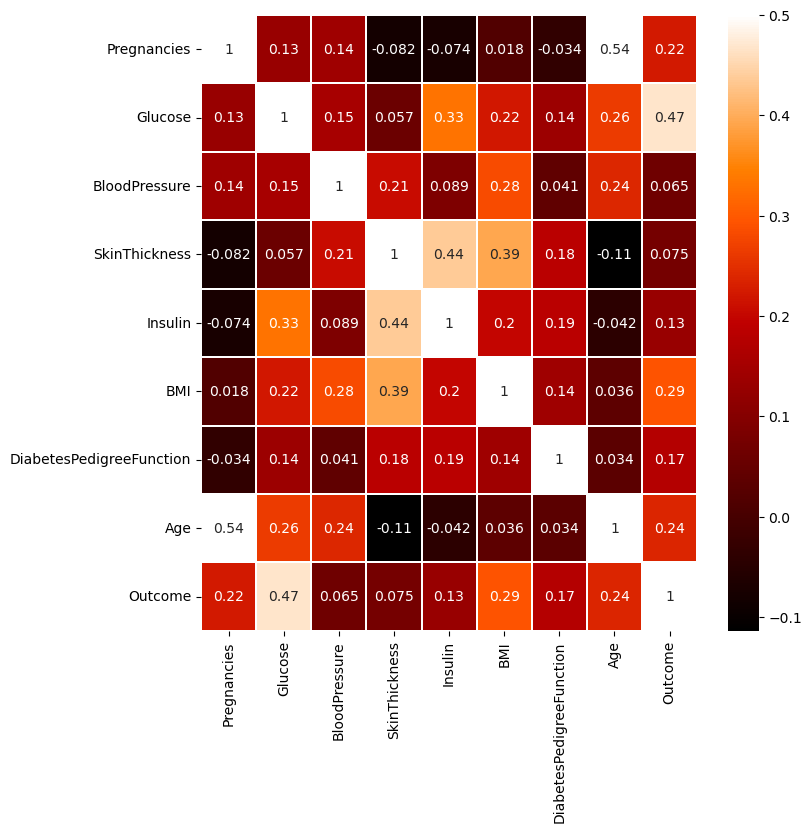

In [10]:
sns.heatmap(dataset.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor = 'white', annot =True)
plt.show()

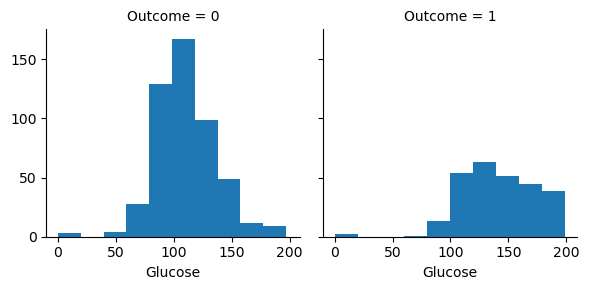

In [12]:
grid = sns.FacetGrid(dataset, col='Outcome')
grid.map(plt.hist, 'Glucose', bins = 10)
plt.show()

## 2. model 형성

In [32]:
X = dataset.drop("Outcome", axis=1)
y = dataset['Outcome']

print(X.shape, y.shape)

(768, 8) (768,)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation = 'relu', input_dim = 8))
model.add(Dense(8, activation = 'relu', input_dim = 12))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'mse'])

In [46]:
model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 40.5614 - accuracy: 0.3490 - mse: 0.6510
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 5.2418 - accuracy: 0.4766 - mse: 0.4787
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 1.2668 - accuracy: 0.5469 - mse: 0.3442
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 1.1143 - accuracy: 0.5898 - mse: 0.3149
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 1.0311 - accuracy: 0.5742 - mse: 0.3041
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9583 - accuracy: 0.5977 - mse: 0.2901
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9087 - accuracy: 0.6029 - mse: 0.2818
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.6146 - mse: 0.2768
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8183 - accuracy: 0.6081 - mse